# READ DATA

In [5]:
import pandas as pd
from sklearn.svm import SVR

# Đọc dữ liệu từ file CSV
df = pd.read_csv("../Dataset/TSLA_data.csv", usecols=["Date", "Close"])
df

,Date,Close
0,1/2/2018,21.368668
1,1/3/2018,21.150000
2,1/4/2018,20.974667
3,1/5/2018,21.105333
4,1/8/2018,22.427334
...,...,...
1830,4/14/2025,252.350006
1831,4/15/2025,254.110001
1832,4/16/2025,241.550003
1833,4/17/2025,241.369995


In [6]:
df["Date"] = pd.to_datetime(df["Date"]).apply(lambda d: d.toordinal())

print(df.head())

     Date      Close
0  736696  21.368668
1  736697  21.150000
2  736698  20.974667
3  736699  21.105333
4  736702  22.427334


In [7]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo bộ chuẩn hóa
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Chuẩn hóa đầu vào (Date) và đầu ra (Close)
X_scaled = scaler_X.fit_transform(df[["Date"]])
y_scaled = scaler_y.fit_transform(df[["Close"]])

# TRAIN MODEL KERNEL LINEAR

In [8]:
# Linear SVR
svr_linear = SVR(kernel='linear', C=100)
svr_linear.fit(X_scaled, y_scaled.ravel())

SVR(C=100, kernel='linear')

# TRAIN MODEL KERNEL RBF

In [9]:
# RBF SVR (cấu hình 1)
svr_rbf1 = SVR(kernel='rbf', C=100, epsilon=0.0001, gamma=10)
svr_rbf1.fit(X_scaled, y_scaled.ravel())

SVR(C=100, epsilon=0.0001, gamma=10)

In [11]:
# RBF SVR (cấu hình 2)
svr_rbf2 = SVR(kernel='rbf', C=1500000, epsilon=0.0000001, gamma=100)
svr_rbf2.fit(X_scaled, y_scaled.ravel())

SVR(C=1500000, epsilon=1e-07, gamma=100)

# TRAIN MODEL KERNEL POLYNOMIAL

In [10]:
# Polynomial SVR
svr_poly = SVR(kernel='poly', C=100, epsilon=0.0001, degree=3)
svr_poly.fit(X_scaled, y_scaled.ravel())

SVR(C=100, epsilon=0.0001, kernel='poly')

# VISUALIZATION MODEL KERNEL LINEAR

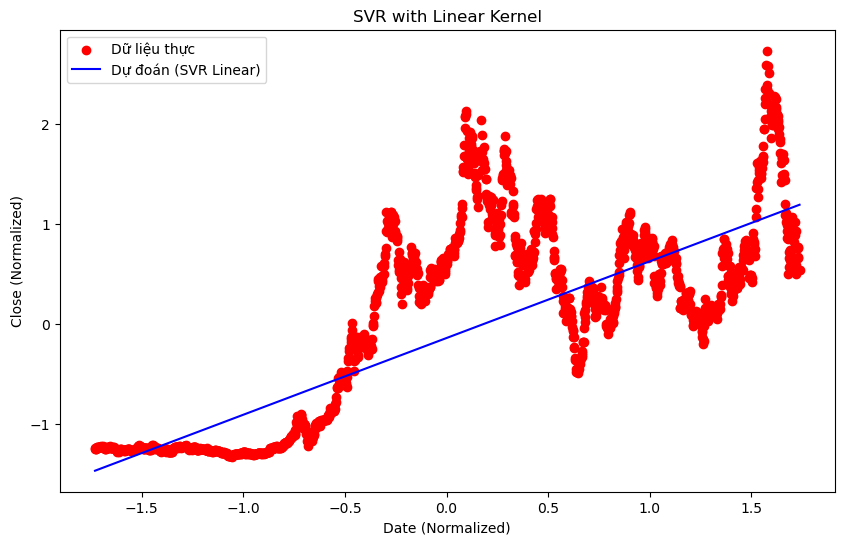

In [12]:
# Mô hình SVR Linear
import matplotlib.pyplot as plt

# Dự đoán với mô hình SVR tuyến tính
y_pred_linear = svr_linear.predict(X_scaled)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='red', label='Dữ liệu thực')
plt.plot(X_scaled, y_pred_linear, color='blue', label='Dự đoán (SVR Linear)')
plt.title('SVR with Linear Kernel')
plt.xlabel('Date (Normalized)')
plt.ylabel('Close (Normalized)')
plt.legend()
plt.show()

# VISUALIZATION MODEL KERNEL RBF

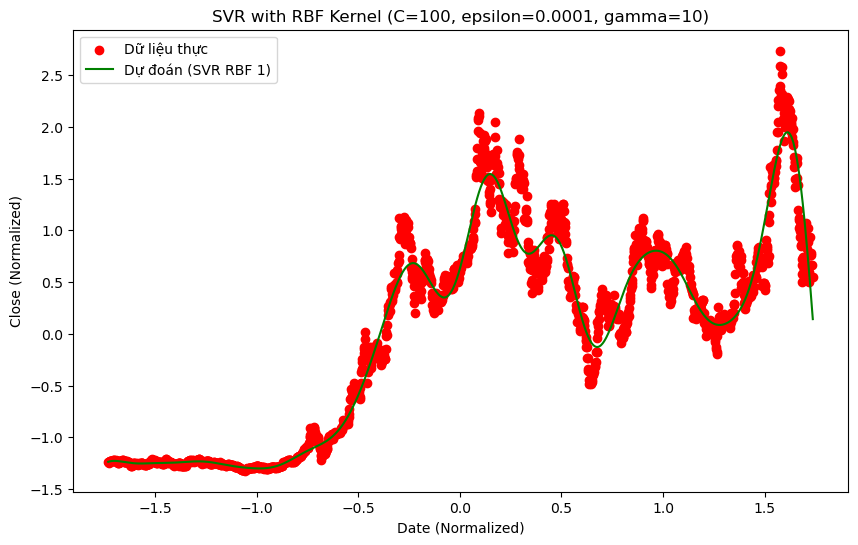

In [13]:
# Mô hình SVR rbf1
y_pred_rbf1 = svr_rbf1.predict(X_scaled)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='red', label='Dữ liệu thực')
plt.plot(X_scaled, y_pred_rbf1, color='green', label='Dự đoán (SVR RBF 1)')
plt.title('SVR with RBF Kernel (C=100, epsilon=0.0001, gamma=10)')
plt.xlabel('Date (Normalized)')
plt.ylabel('Close (Normalized)')
plt.legend()
plt.show()

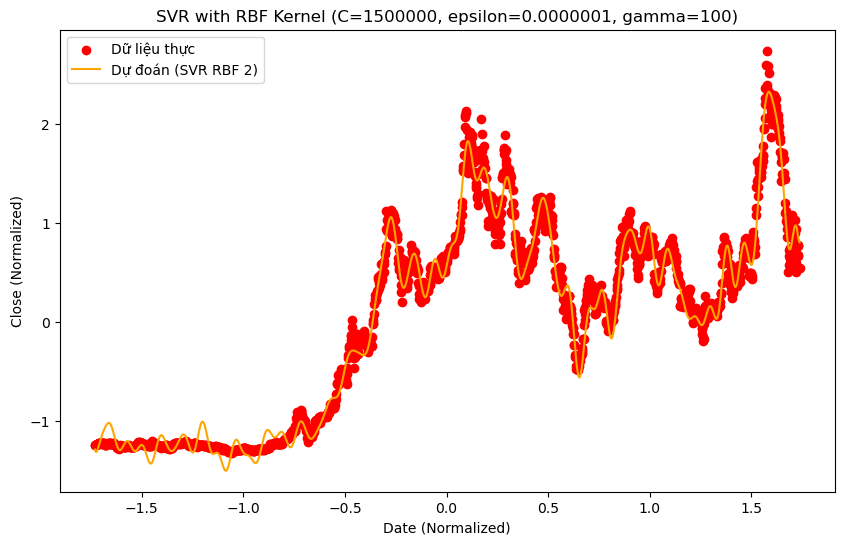

In [14]:
# Mô hình SVR rbf2
y_pred_rbf2 = svr_rbf2.predict(X_scaled)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='red', label='Dữ liệu thực')
plt.plot(X_scaled, y_pred_rbf2, color='orange', label='Dự đoán (SVR RBF 2)')
plt.title('SVR with RBF Kernel (C=1500000, epsilon=0.0000001, gamma=100)')
plt.xlabel('Date (Normalized)')
plt.ylabel('Close (Normalized)')
plt.legend()
plt.show()

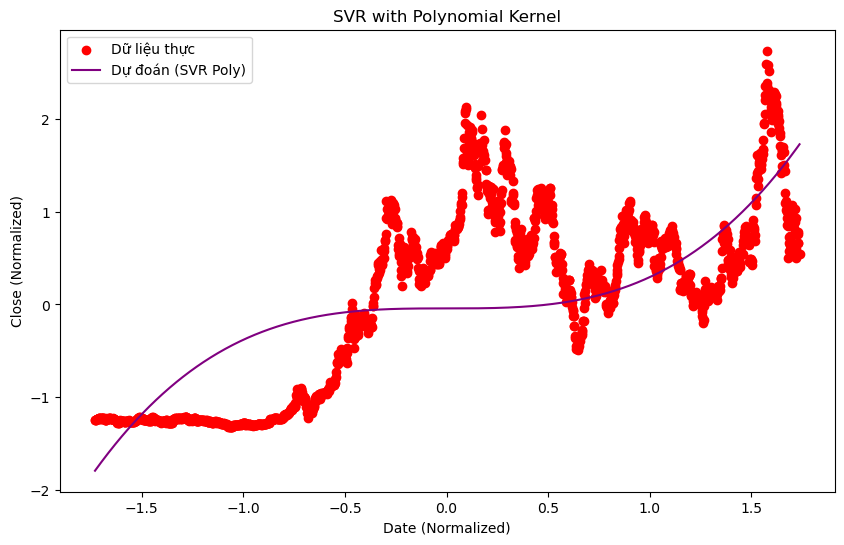

In [15]:
# Mô hình SVR poly
y_pred_poly = svr_poly.predict(X_scaled)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='red', label='Dữ liệu thực')
plt.plot(X_scaled, y_pred_poly, color='purple', label='Dự đoán (SVR Poly)')
plt.title('SVR with Polynomial Kernel')
plt.xlabel('Date (Normalized)')
plt.ylabel('Close (Normalized)')
plt.legend()
plt.show()

# EVALUATION

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Tính RMSE cho mỗi mô hình
rmse_linear = np.sqrt(mean_squared_error(y_scaled, y_pred_linear))
rmse_rbf1 = np.sqrt(mean_squared_error(y_scaled, y_pred_rbf1))
rmse_rbf2 = np.sqrt(mean_squared_error(y_scaled, y_pred_rbf2))
rmse_poly = np.sqrt(mean_squared_error(y_scaled, y_pred_poly))

# In kết quả RMSE
print(f"RMSE for SVR with Linear Kernel: {rmse_linear}")
print(f"RMSE for SVR with RBF Kernel (C=100, epsilon=0.0001, gamma=10): {rmse_rbf1}")
print(f"RMSE for SVR with RBF Kernel (C=1500000, epsilon=0.0000001, gamma=100): {rmse_rbf2}")
print(f"RMSE for SVR with Polynomial Kernel: {rmse_poly}")

RMSE for SVR with Linear Kernel: 0.6342421358045796
RMSE for SVR with RBF Kernel (C=100, epsilon=0.0001, gamma=10): 0.2060762843485501
RMSE for SVR with RBF Kernel (C=1500000, epsilon=0.0000001, gamma=100): 0.13057786591867387
RMSE for SVR with Polynomial Kernel: 0.7264802381638493


In [17]:
# Chọn mô hình với RMSE thấp nhất
best_model = None
rmse_values = [rmse_linear, rmse_rbf1, rmse_rbf2, rmse_poly]
models = [svr_linear, svr_rbf1, svr_rbf2, svr_poly]
model_names = ['SVR Linear', 'SVR RBF 1', 'SVR RBF 2', 'SVR Polynomial']

# Tìm mô hình có RMSE thấp nhất
min_rmse_index = np.argmin(rmse_values)
best_model = models[min_rmse_index]

# In ra mô hình tốt nhất
print(f"Best model is: {model_names[min_rmse_index]} with RMSE: {rmse_values[min_rmse_index]}")

Best model is: SVR RBF 2 with RMSE: 0.13057786591867387


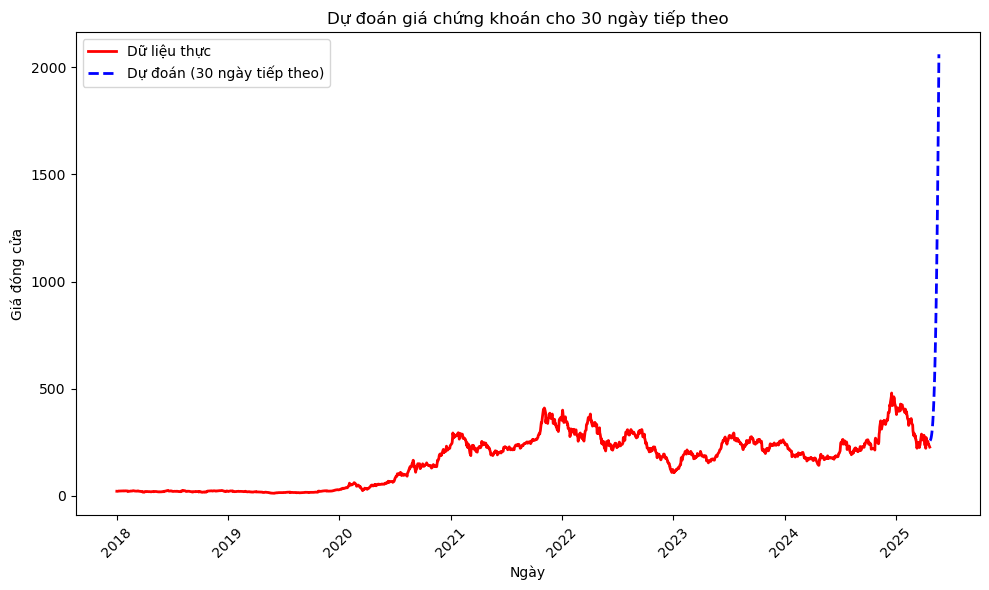

In [28]:
# Tạo 30 ngày tiếp theo dưới dạng ordinal
last_date_ordinal = df["Date"].iloc[-1]
next_30_dates_ordinal = np.arange(last_date_ordinal + 1, last_date_ordinal + 31).reshape(-1, 1)

# Chuyển next_30_dates_ordinal thành DataFrame với tên cột
next_30_dates_df = pd.DataFrame(next_30_dates_ordinal, columns=["Date"])

# Chuẩn hóa các ngày này
next_30_scaled = scaler_X.transform(next_30_dates_df)

# Dự đoán giá trị đã chuẩn hóa
predicted_scaled = best_model.predict(next_30_scaled)

# Chuyển về giá trị gốc
predicted_values = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1)).flatten()

# Chuyển ordinal về datetime
predicted_dates = [pd.Timestamp.fromordinal(int(day)) for day in next_30_dates_ordinal.flatten()]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot([pd.Timestamp.fromordinal(int(d)) for d in df["Date"]], df["Close"], color='red', label='Dữ liệu thực', linewidth=2)
plt.plot(predicted_dates, predicted_values, color='blue', label='Dự đoán (30 ngày tiếp theo)', linestyle='--', linewidth=2)
plt.title('Dự đoán giá chứng khoán cho 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
